Image shape: (91, 109, 91)
Data type: float64
Value range: -22.98235321044922 to 26.28485679626465


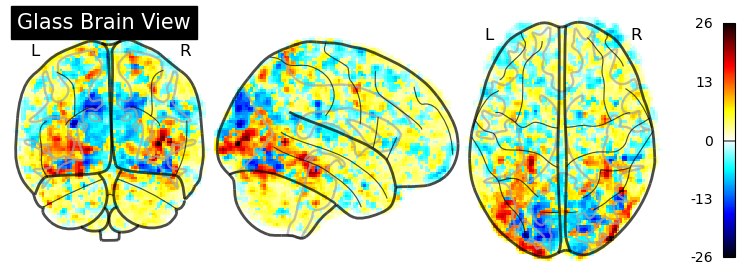

In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

# File path
file_path = '/lab_data/behrmannlab/vlad/ptoc/sub-025/ses-01/derivatives/gca/combined_object_pIPS_left_mni.nii.gz'

# Load the NIfTI file
img = nib.load(file_path)
data = img.get_fdata()

# Print basic information
print(f"Image shape: {img.shape}")
print(f"Data type: {data.dtype}")
#print(f"Value range: {np.min(data)} to {np.max(data)}")
print(f"Value range: {np.min(data)} to {np.max(data)}")

# Create a 3D plot using nilearn
plotting.plot_glass_brain(img, threshold=0.5, colorbar=True, plot_abs=False, title='Glass Brain View')
plt.show()

Image shape: (91, 109, 91)
Data type: float64
Value range: -33.0053596496582 to 43.619930267333984


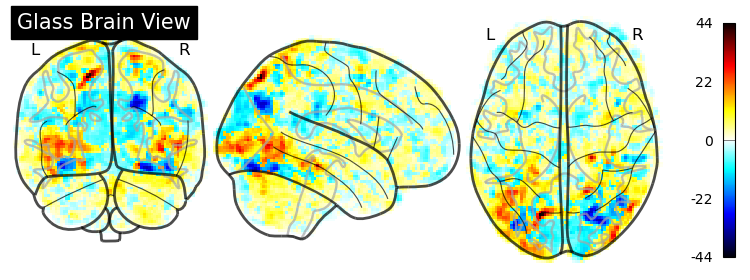

In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

# File path
file_path = '/lab_data/behrmannlab/vlad/ptoc/sub-025/ses-01/derivatives/gca/combined_object_pIPS_right_mni.nii.gz'

# Load the NIfTI file
img = nib.load(file_path)
data = img.get_fdata()

# Print basic information
print(f"Image shape: {img.shape}")
print(f"Data type: {data.dtype}")
print(f"Value range: {np.min(data)} to {np.max(data)}")

# Create a 3D plot using nilearn
plotting.plot_glass_brain(img, threshold=0.5, colorbar=True, plot_abs=False, title='Glass Brain View')
plt.show()

File: combined_object_pIPS_left_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -22.98235321044922 to 26.28485679626465


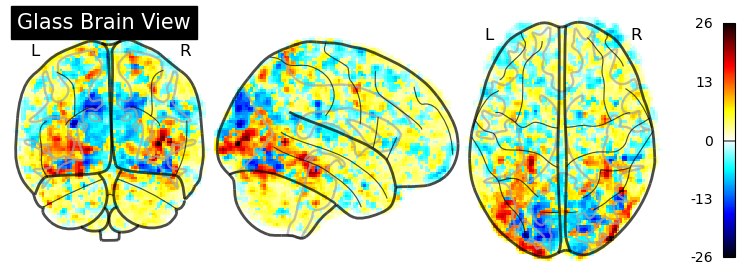

File: combined_object_pIPS_left_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -22.98235321044922 to 26.28485679626465


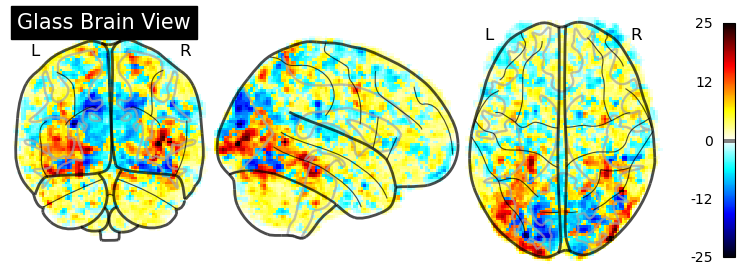

Group average saved to: group_average.nii.gz


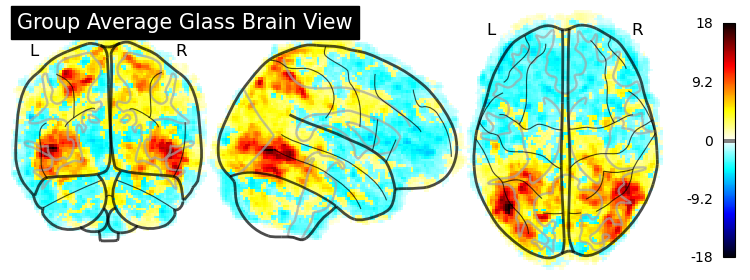

In [15]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import glob
import os

def process_single_file(file_path, manual_scale=False, vmin=None, vmax=None):
    # Load the NIfTI file
    img = nib.load(file_path)
    data = img.get_fdata()

    # Print basic information
    print(f"File: {os.path.basename(file_path)}")
    print(f"Image shape: {img.shape}")
    print(f"Data type: {data.dtype}")
    print(f"Value range: {np.min(data)} to {np.max(data)}")
    
    # Create a 3D plot using nilearn
    if manual_scale and vmin is not None and vmax is not None:
        plotting.plot_glass_brain(img, threshold=0.5, colorbar=True, plot_abs=False, 
                                  title='Glass Brain View', vmin=vmin, vmax=vmax)
    else:
        plotting.plot_glass_brain(img, threshold=0.5, colorbar=True, plot_abs=False, 
                                  title='Glass Brain View')
    plt.show()

def group_average(file_pattern):
    # Get all files matching the pattern
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return

    # Load all images
    images = [nib.load(f) for f in files]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return

    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)

    # Create a new NIfTI image with the average data
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)

    # Save the average image
    output_path = 'group_average.nii.gz'
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Display the average image
    plotting.plot_glass_brain(avg_img, threshold=0.5, colorbar=True, plot_abs=False, 
                              title='Group Average Glass Brain View')
    plt.show()

# File path for single file processing
file_path = '/lab_data/behrmannlab/vlad/ptoc/sub-025/ses-01/derivatives/gca/combined_object_pIPS_left_mni.nii.gz'

# Process single file
process_single_file(file_path)

# Process single file with manual scaling
process_single_file(file_path, manual_scale=True, vmin=-25, vmax=25)

# Group average
file_pattern = '/lab_data/behrmannlab/vlad/ptoc/sub-*/ses-01/derivatives/gca/combined_object_pIPS_left_mni.nii.gz'
group_average(file_pattern)


Processing pIPS_right...
File: combined_object_pIPS_right_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -33.0053596496582 to 43.619930267333984


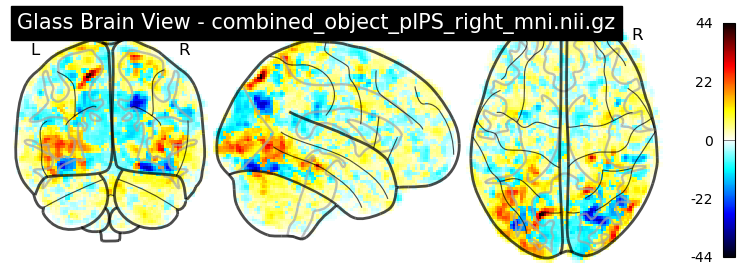

File: combined_object_pIPS_right_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -33.0053596496582 to 43.619930267333984


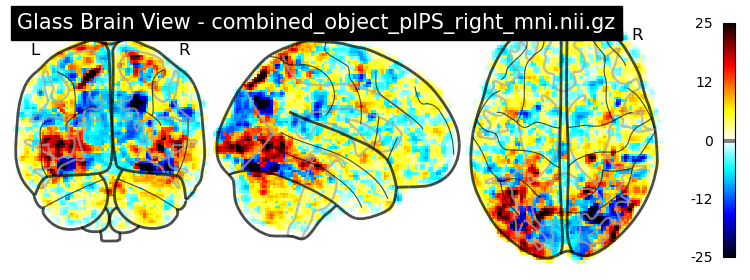


Subjects included in pIPS_right analysis:
- sub-025
Group average saved to: group_average_pIPS_right.nii.gz


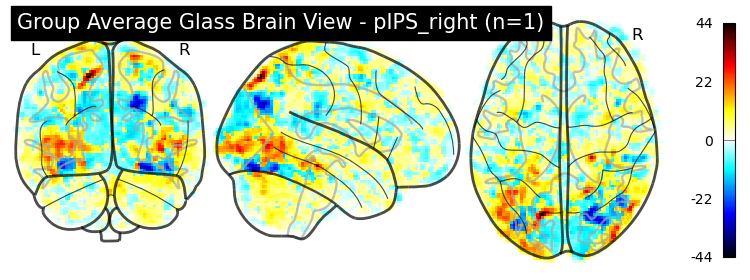


Processing pIPS_left...
File: combined_object_pIPS_left_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -22.98235321044922 to 26.28485679626465


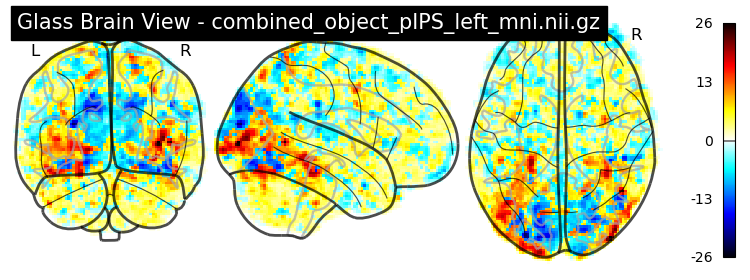

File: combined_object_pIPS_left_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -22.98235321044922 to 26.28485679626465


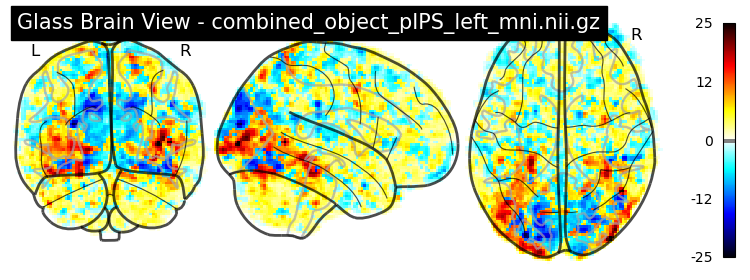


Subjects included in pIPS_left analysis:
- sub-025
- sub-038
- sub-057
- sub-059
- sub-064
Group average saved to: group_average_pIPS_left.nii.gz


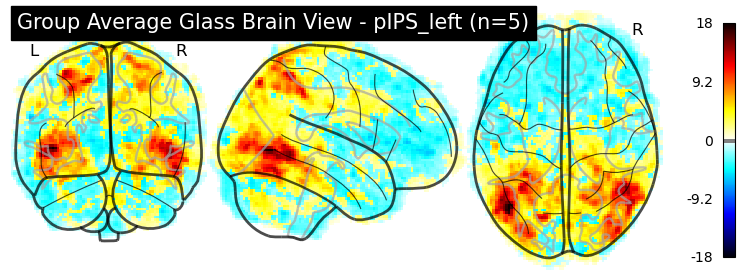


Processing LO...
File not found for LO. Skipping this region.

Processing complete.


In [20]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import glob
import os
import re

def process_single_file(file_path, manual_scale=False, vmin=None, vmax=None):
    # Load the NIfTI file
    img = nib.load(file_path)
    data = img.get_fdata()

    # Print basic information
    print(f"File: {os.path.basename(file_path)}")
    print(f"Image shape: {img.shape}")
    print(f"Data type: {data.dtype}")
    print(f"Value range: {np.min(data)} to {np.max(data)}")
    
    # Create a 3D plot using nilearn
    if manual_scale and vmin is not None and vmax is not None:
        plotting.plot_glass_brain(img, threshold=0.5, colorbar=True, plot_abs=False, 
                                  title=f'Glass Brain View - {os.path.basename(file_path)}', vmin=vmin, vmax=vmax)
    else:
        plotting.plot_glass_brain(img, threshold=0.5, colorbar=True, plot_abs=False, 
                                  title=f'Glass Brain View - {os.path.basename(file_path)}')
    plt.show()


def group_average(file_pattern, region):
    # Get all files matching the pattern
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return

    # Extract subject numbers and create a dictionary of files
    subject_files = {}
    for f in files:
        match = re.search(r'sub-(\d+)', f)
        if match:
            subject_files[match.group(1)] = f

    # Sort subjects numerically
    sorted_subjects = sorted(subject_files.keys(), key=int)

    # Report on included and excluded subjects
    print(f"\nSubjects included in {region} analysis:")
    for subject in sorted_subjects:
        print(f"- sub-{subject}")

    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return

    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)

    # Create a new NIfTI image with the average data
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)

    # Save the average image
    output_path = f'group_average_{region}.nii.gz'
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Display the average image
    plotting.plot_glass_brain(avg_img, threshold=0.5, colorbar=True, plot_abs=False, 
                              title=f'Group Average Glass Brain View - {region} (n={len(images)})')
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left', 'LO']

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    
    # File path for single file processing (using sub-025 as an example)
    file_path = f'{base_path}/sub-025/ses-01/derivatives/gca/combined_object_{region}_mni.nii.gz'
    
    if os.path.exists(file_path):
        # Process single file
        process_single_file(file_path)

        # Process single file with manual scaling
        process_single_file(file_path, manual_scale=True, vmin=-25, vmax=25)

        # Group average
        file_pattern = f'{base_path}/sub-*/ses-01/derivatives/gca/combined_object_{region}_mni.nii.gz'
        group_average(file_pattern, region)
    else:
        print(f"File not found for {region}. Skipping this region.")

print("\nProcessing complete.")


Processing pIPS_right...
File: combined_object_pIPS_right_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -33.0053596496582 to 43.619930267333984


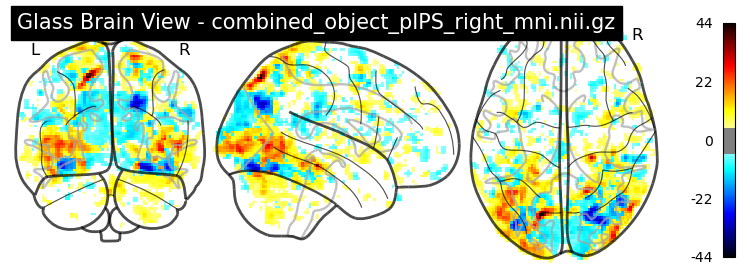

File: combined_object_pIPS_right_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -33.0053596496582 to 43.619930267333984


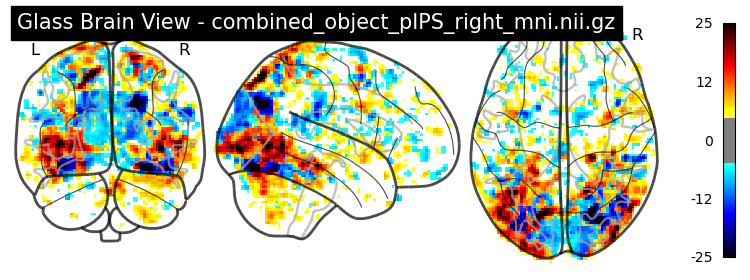


Subjects included in pIPS_right analysis:
- sub-025
- sub-057
Group average saved to: group_average_pIPS_right.nii.gz


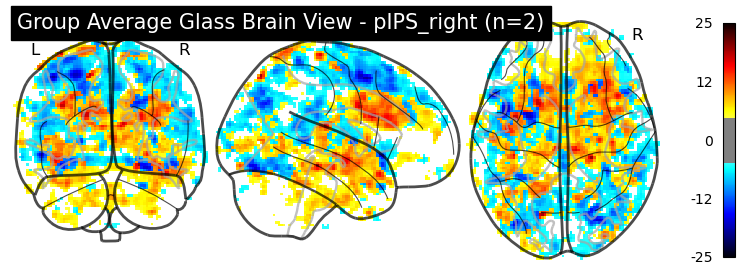


Processing pIPS_left...
File: combined_object_pIPS_left_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -22.98235321044922 to 26.28485679626465


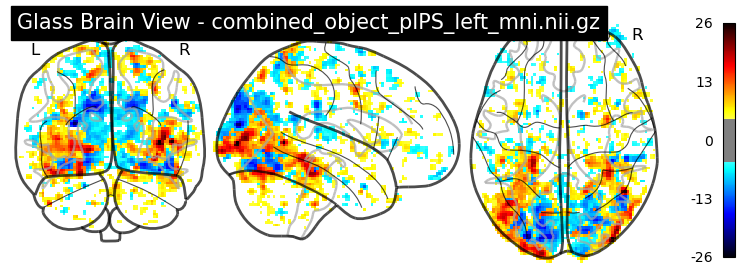

File: combined_object_pIPS_left_mni.nii.gz
Image shape: (91, 109, 91)
Data type: float64
Value range: -22.98235321044922 to 26.28485679626465


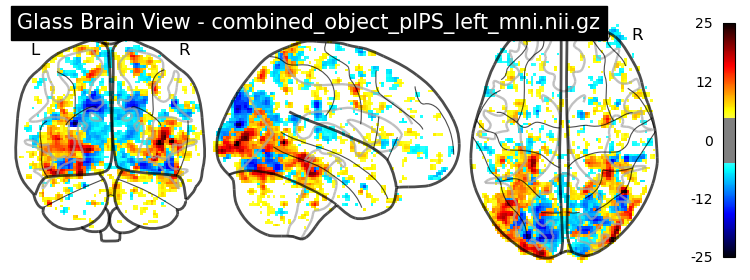


Subjects included in pIPS_left analysis:
- sub-025
- sub-038
- sub-057
- sub-059
- sub-064
Group average saved to: group_average_pIPS_left.nii.gz


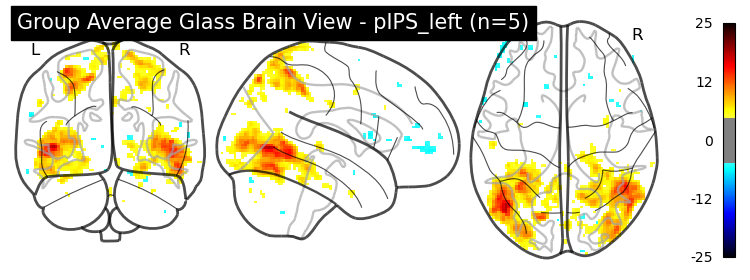


Processing LO...
File not found for LO. Skipping this region.

Processing complete.


In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting
import glob
import os
import re

def process_single_file(file_path, manual_scale=False, vmin=None, vmax=None):
    # Load the NIfTI file
    img = nib.load(file_path)
    data = img.get_fdata()

    # Print basic information
    print(f"File: {os.path.basename(file_path)}")
    print(f"Image shape: {img.shape}")
    print(f"Data type: {data.dtype}")
    print(f"Value range: {np.min(data)} to {np.max(data)}")
    
    # Create a 3D plot using nilearn
    if manual_scale and vmin is not None and vmax is not None:
        plotting.plot_glass_brain(img, threshold=5, colorbar=True, plot_abs=False, 
                                  title=f'Glass Brain View - {os.path.basename(file_path)}', vmin=vmin, vmax=vmax)
    else:
        plotting.plot_glass_brain(img, threshold=5, colorbar=True, plot_abs=False, 
                                  title=f'Glass Brain View - {os.path.basename(file_path)}')
    plt.show()

def group_average(file_pattern, region, scale=25):
    # Get all files matching the pattern
    files = glob.glob(file_pattern)
    
    if not files:
        print(f"No files found matching the pattern: {file_pattern}")
        return

    # Extract subject numbers and create a dictionary of files
    subject_files = {}
    for f in files:
        match = re.search(r'sub-(\d+)', f)
        if match:
            subject_files[match.group(1)] = f

    # Sort subjects numerically
    sorted_subjects = sorted(subject_files.keys(), key=int)

    # Report on included subjects
    print(f"\nSubjects included in {region} analysis:")
    for subject in sorted_subjects:
        print(f"- sub-{subject}")

    # Load all images
    images = [nib.load(subject_files[subject]) for subject in sorted_subjects]
    
    # Check if all images have the same shape
    shapes = [img.shape for img in images]
    if len(set(shapes)) > 1:
        print("Error: Not all images have the same shape.")
        return

    # Calculate the average
    avg_data = np.mean([img.get_fdata() for img in images], axis=0)

    # Create a new NIfTI image with the average data
    avg_img = nib.Nifti1Image(avg_data, images[0].affine, images[0].header)

    # Save the average image
    output_path = f'group_average_{region}.nii.gz'
    nib.save(avg_img, output_path)
    print(f"Group average saved to: {output_path}")

    # Display the average image with fixed scale
    plotting.plot_glass_brain(avg_img, threshold=5, colorbar=True, plot_abs=False, 
                              title=f'Group Average Glass Brain View - {region} (n={len(images)})',
                              vmin=-scale, vmax=scale)
    plt.show()

# Base path
base_path = '/lab_data/behrmannlab/vlad/ptoc'

# Regions to process
regions = ['pIPS_right', 'pIPS_left', 'LO']

# Loop through regions
for region in regions:
    print(f"\nProcessing {region}...")
    
    # File path for single file processing (using sub-025 as an example)
    file_path = f'{base_path}/sub-025/ses-01/derivatives/gca/combined_object_{region}_mni.nii.gz'
    
    if os.path.exists(file_path):
        # Process single file
        process_single_file(file_path)

        # Process single file with manual scaling
        process_single_file(file_path, manual_scale=True, vmin=-25, vmax=25)

        # Group average with fixed scale
        file_pattern = f'{base_path}/sub-*/ses-01/derivatives/gca/combined_object_{region}_mni.nii.gz'
        group_average(file_pattern, region, scale=25)
    else:
        print(f"File not found for {region}. Skipping this region.")

print("\nProcessing complete.")